In [1]:
import numpy as np
from sklearn.datasets import make_sparse_spd_matrix
from scipy import linalg as LA
import pandas as pd
import time, os
import matplotlib.pyplot as plt

from pyinstrument import Profiler

from infoband.band_info import InfoCorrBand
from wlpy.covariance import Covariance
from utils.adpt_correlation_threshold import AdptCorrThreshold
from wlpy.gist import heatmap

import warnings
warnings.filterwarnings("ignore")

from my_api import *

# proposed estimator

In [2]:
# profiler = Profiler()
# profiler.start()

cv_option, verbose = 'fast_iter', False
N = 500
T = 100
rho = 0.8
S = gen_S_AR1(N = N, rho = rho)
R = cov2cor(S)

# profiler.stop()
# profiler.print()

fro 0.5 random None


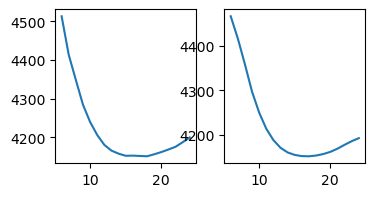

0 17

  _     ._   __/__   _ _  _  _ _/_   Recorded: 22:53:23  Samples:  157437
 /_//_/// /_\ / //_// / //_'/ //     Duration: 191.243   CPU time: 584.625
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"4aff69bd-8f85-4997-beb0-daca421b18fe" --shell=9007 --transport="tcp" --iopub=9009 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-17820AJNB6LC4E4pf.json

191.243 <module>  None
├─ 147.427 InfoCorrBand.auto_fit  infoband\band_info.py:270
│  └─ 147.400 InfoCorrBand.k_by_cv  infoband\band_info.py:140
│     └─ 146.177 tmp__loss_func  infoband\band_info.py:177
│        └─ 146.098 InfoCorrBand.__loss_func  infoband\band_info.py:219
│           ├─ 119.081 InfoCorrBand.__init__  infoband\band_info.py:37
│           │  ├─ 101.529 InfoCorrBand.feed_info  infoband\band_info.py:74
│           │  │  ├─ 94.915 InfoCorrBand.

KeyboardInterrupt: 

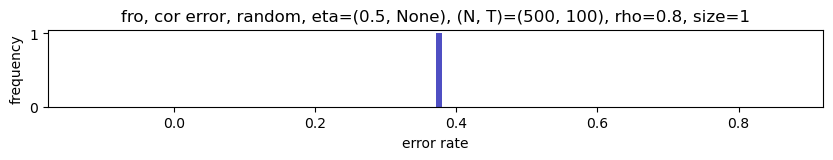

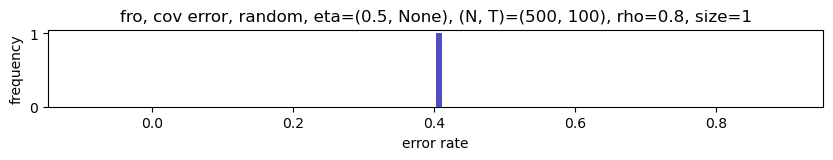

In [3]:
for ord in ['fro', 2]:
    for eta in [0.5, 0.8, 0.95, 1]:
        draw_type, near_factor = ('random', None)
        err_cor = []
        err_cov = []
        
        print(ord, eta, draw_type, near_factor)
        
        for i in range(100): 
            profiler = Profiler()
            profiler.start()
            
            X = np.random.RandomState(seed = i).multivariate_normal(mean = np.zeros(N), cov = S, size = T)
            L = gen_L(S, eta, draw_type = draw_type, is_random = 0, near_factor = near_factor, rand_seed = i)
            c = InfoCorrBand(X, L, num_cv = 50)
            R_est, S_est, k = c.auto_fit(cv_option, verbose)
            
            print(i, k)
            profiler.stop()
            profiler.print()
            
            err_cor.append(LA.norm(R - R_est, ord))
            err_cov.append(LA.norm(S - S_est, ord))
        err_cor = err_cor / LA.norm(R, ord)
        err_cov = err_cov / LA.norm(S, ord)
        
        save_data_fig(err_cor, ord, 'cor', draw_type, eta, N, T, rho, near_factor, is_save = 1)
        save_data_fig(err_cov, ord, 'cov', draw_type, eta, N, T, rho, near_factor, is_save = 1)

# Other method

In [30]:
N = 500
T = 300
rho = 0.95
S = gen_S_AR1(N = N, rho = rho)
R = cov2cor(S)
seed = 1
rng = np.random.RandomState(seed) if 1 else np.random
X = rng.multivariate_normal(mean = np.zeros(N), cov = S, size = T)

In [31]:
# G_zero = np.zeros((N, N))
G_zero = np.ones((N, N)) - np.eye(N)
m = AdptCorrThreshold(pd.DataFrame(X), G_zero)

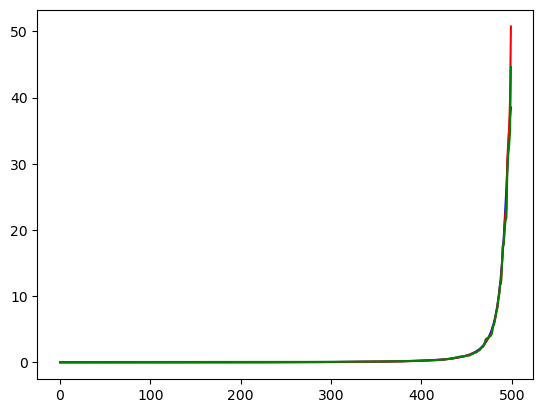

In [40]:
plt.plot(np.linalg.eigvals(S)[::-1], color = 'blue');
plt.plot(np.sort(np.linalg.eigvals(m.sample_cov())), color = 'red');
plt.plot(np.sort(np.linalg.eigvals(m.nonlin_shrink())), color = 'green');
# plt.plot(np.sort(np.linalg.eigvals(m.lw_lin_shrink())), color = 'purple');